In [1]:
import json, glob, os, numpy
from data_process_functions_lili_original import *
os.chdir("/Users/adamyedidia/breast_cancer/spreadsheets/")

import openpyxl, pprint


SHEET_NAME = 'manisha_new_invasive.xlsx'
#LIST_OF_BINARY_COLS = ['Q', 'R', 'S', 'T','U','V','W','X','Y','Z','AA','AB','AC']
LIST_OF_BINARY_COLS = ['D','F','G','H','I','J','K','L','M','T','U','W','X','Y','AA','AE','AH','AJ']
LIST_OF_REAL_COLS = ['A','C','N','O','P','Q','R','S','V','Z','U','V','Z']  
ANSWER_COL = 'AQ'
        
data,feature_names,result=dataprocess(SHEET_NAME,LIST_OF_BINARY_COLS,LIST_OF_REAL_COLS,ANSWER_COL)
yy=[1 if x=='M' else 0 for x in result]
print 'cancer numbers: %d' %yy.count(1)
y=np.array(yy)
X_structure=data[:,1:]
feature_names_structure=feature_names[1:]
n=X_structure.shape[0]


def readreport(SHEET_NAME):
    sheet = openpyxl.load_workbook(SHEET_NAME).active
    report=[]
    for j in range (1,sheet.max_column+1):
        if sheet.cell(row=1,column=j).value=='BXPATHREP':
            for i in range(2,sheet.max_row+1):
                rpt=sheet.cell(row=i,column=j).value
                #print rpt
                #rpt.replace('_x000D_\n_x000D_\n', '\n')
                rpt=rpt.replace('_x000D_\n_x000D_\n', '')
                rpt=rpt.replace('MASSACHUSETTS GENERAL HOSPITAL','')
                rpt=rpt.replace('BOSTON, MA  REMOVED_CASE_ID','')
                rpt=rpt.lower()
                rpt=rpt.replace('removed_patient_name','')
                rpt=rpt.replace('_patient_name_removed','')
                rpt=rpt.replace('removed_accession_id','')
                rpt=rpt.replace('removed_case_id','')
                rpt=rpt.replace('removed_date','')
                rpt=rpt.replace('removed_month','')
                rpt=rpt.replace('removed_patient_','')
                rpt=rpt.replace('\n\n','')  
                rpt=rpt.replace('\n \n','')
                rpt.strip('\n\n')
                rpt.strip('\n \n')
                report.append(rpt)
    return report

report= readreport(SHEET_NAME)
vectorizer = CountVectorizer(ngram_range=(1, 2),min_df=1)
#XXX = vectorizer.fit_transform(report)
ft_report= numpy.array(vectorizer.fit_transform(report).toarray())

feature_names_report = vectorizer.get_feature_names()
feature_names_report=np.array(feature_names_report,dtype=str)
print "total uni & bi gram features are :%s" %str(feature_names_report.shape)
count=numpy.sum(ft_report,axis=0)
delete=[]
thresh=20             #####################===============you can change this guy
for i in range(1,count.shape[0]):
    if count[i]<thresh:
        delete.append(i)
ft_report_p=numpy.delete(ft_report,delete,1)
feature_names_report_prune=numpy.delete(feature_names_report,delete,0)
print "total uni & bi gram features pruned with threshold of 20  are  :%s" %str(feature_names_report_prune.shape)
ft_report_prune=ft_report_p

Real-valued Features:
ID
AGE
WEIGHT
HEIGHT
BIRTH
AGEPREG
MAAGE
MPAGE
DENSITY
PRIORBX
ASSESS
DENSITY
PRIORBX

Binary Features:
RACE
LOC
SPROCS
FBC
PBC
POC
SMOKE
ALCOHOL
ASHKENAZI
HORMONE
ASSESS
FIRSTMAM
FROMSCREEN
CLINFIND
FINDTYPE
SIDE
BXTYPE
BXPATH_CONCAT

Result:
INVASIVE
data size is: 1118 X 156
test reasult is: INVASIVE
cancer numbers: 43
total uni & bi gram features are :(43815,)
total uni & bi gram features pruned with threshold of 20  are  :(2299,)


In [2]:
ft_report_prune.shape

(1117, 2299)

In [3]:
ft_report_prune.shape

(1117, 2299)

In [4]:
f_structure= ExtraTreesClassifier(n_estimators=200,max_depth=12,max_features=80,class_weight = {1:7},
                              random_state=123)
f_report = ExtraTreesClassifier(n_estimators=200,max_depth=10,max_features=500,class_weight = {1:5},
                              random_state=123)
'''
feature_ranking(f_structure,feature_names_structure,X_structure,y,'importantfeature_structure.txt',pp=1)
feature_ranking(f_report,feature_names_report_prune,ft_report_prune,y,'importantfeature_report.txt',pp=1)
'''

"\nfeature_ranking(f_structure,feature_names_structure,X_structure,y,'importantfeature_structure.txt',pp=1)\nfeature_ranking(f_report,feature_names_report_prune,ft_report_prune,y,'importantfeature_report.txt',pp=1)\n"

new sets
(array([ 14,  16,  31,  63,  96, 155, 185, 186]),)


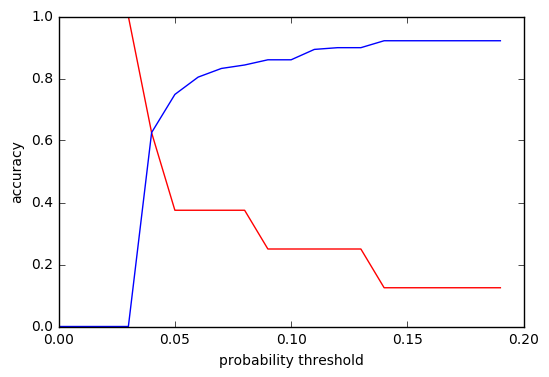

[8, 8, 8, 8, 5, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]
179.0 0 0 165
BEST LOW RISK PRECISION:
0.0% 0 patients
BEST MEDIUM RISK PRECISION:
0.0% 0 patients
BEST HIGH RISK PRECISION:
100.0% 179.0 patients


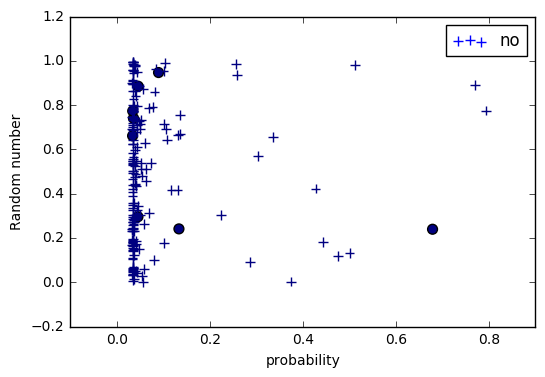

new sets
(array([ 19,  27,  89,  97, 149, 164, 183]),)


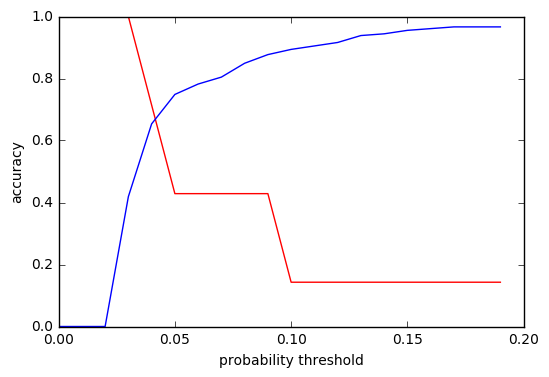

[7, 7, 7, 7, 5, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
179.0 75 75 173
BEST LOW RISK PRECISION:
41.8994413408% 75 patients
BEST MEDIUM RISK PRECISION:
0.0% 0 patients
BEST HIGH RISK PRECISION:
58.1005586592% 104.0 patients


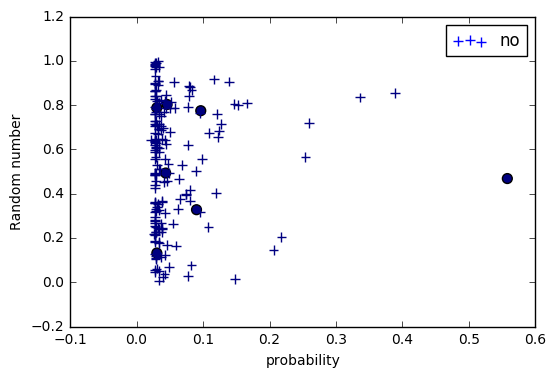

new sets
(array([  9,  28,  72,  79,  87,  93, 184]),)


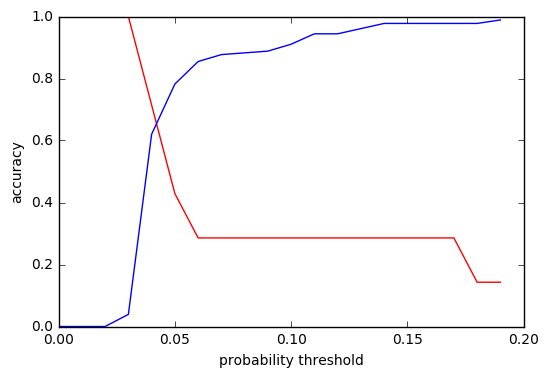

[7, 7, 7, 7, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
179.0 7 7 177
BEST LOW RISK PRECISION:
3.91061452514% 7 patients
BEST MEDIUM RISK PRECISION:
0.0% 0 patients
BEST HIGH RISK PRECISION:
96.0893854749% 172.0 patients


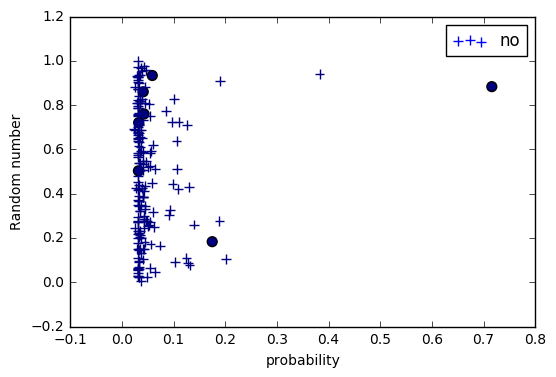

new sets
(array([  9,  12,  35,  47,  50, 131, 173]),)


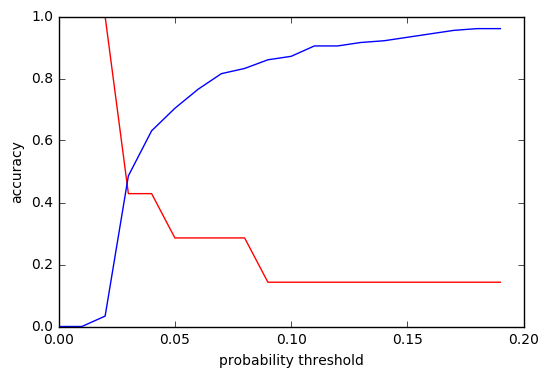

[7, 7, 7, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
179.0 6 6 172
BEST LOW RISK PRECISION:
3.35195530726% 6 patients
BEST MEDIUM RISK PRECISION:
0.0% 0 patients
BEST HIGH RISK PRECISION:
96.6480446927% 173.0 patients


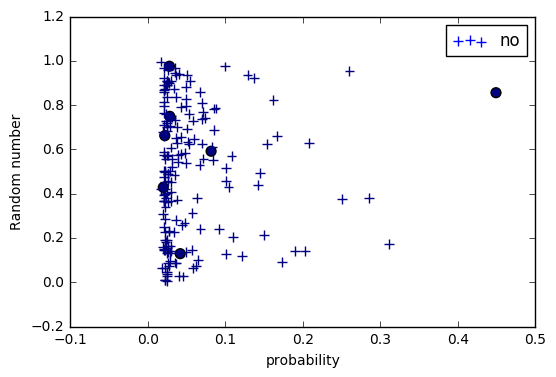

new sets
(array([ 11,  81,  99, 105, 144, 170, 183]),)


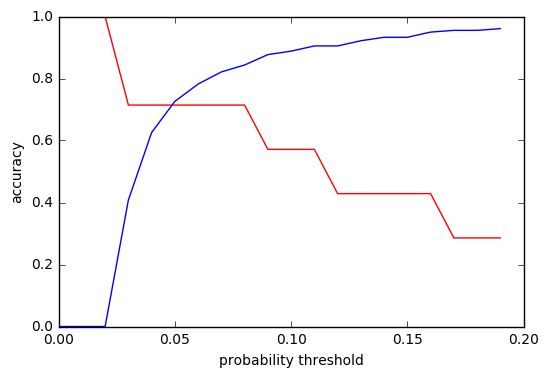

[7, 7, 7, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2]
179.0 0 0 172
BEST LOW RISK PRECISION:
0.0% 0 patients
BEST MEDIUM RISK PRECISION:
0.0% 0 patients
BEST HIGH RISK PRECISION:
100.0% 179.0 patients


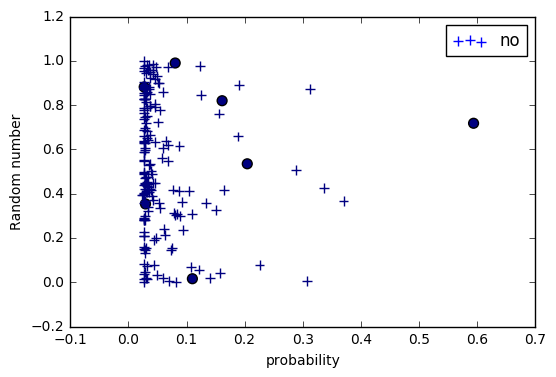

new sets
(array([ 21,  44,  81, 114, 158, 177, 185]),)


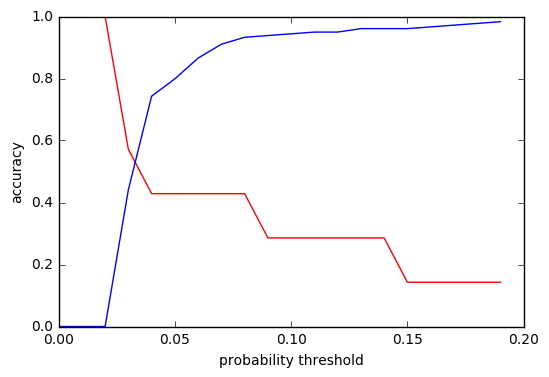

[7, 7, 7, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
179.0 0 0 176
BEST LOW RISK PRECISION:
0.0% 0 patients
BEST MEDIUM RISK PRECISION:
0.0% 0 patients
BEST HIGH RISK PRECISION:
100.0% 179.0 patients


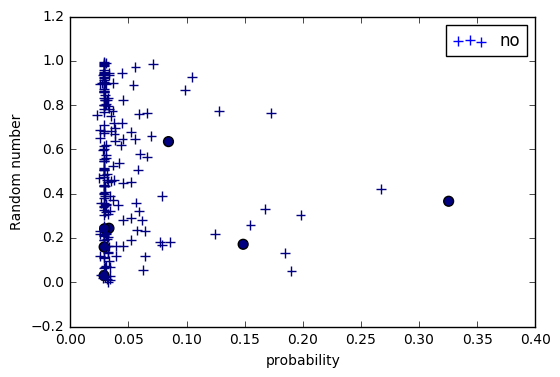

[43, 43, 43, 34, 26, 19, 18, 18, 18, 14, 12, 12, 11, 11, 10, 9, 9, 8, 7, 7]
1074.0 6 6 1035
BEST LOW RISK PRECISION:
0.558659217877% 6 patients
BEST MEDIUM RISK PRECISION:
0.0% 0 patients
BEST HIGH RISK PRECISION:
99.4413407821% 1068.0 patients


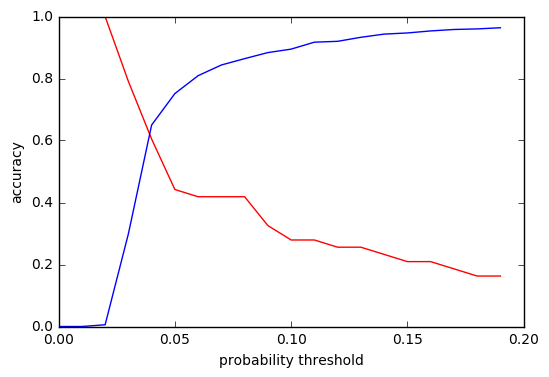

In [5]:
from sklearn.cross_validation import StratifiedShuffleSplit

n_str=100
n_report=180
weight =3
random_state= 127

#sss = StratifiedShuffleSplit(y, 10, test_size=0.05, random_state=1237)
#rs = cross_validation.ShuffleSplit(len(y), n_iter=10,test_size=.1, random_state=1237)

from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(y, 6, shuffle=True, random_state=random_state)

k=0

YTEST=[]
YTEST_index=[]
Probability=[]

def describeResults(mResults, bResults, numMResults, numBResults):
    print mResults
    bestLowRisk = 0
    bestMedRisk = 0
    bestHighRisk = 0
    for i, mResult in enumerate(mResults):
        if mResult/float(numMResults) > 0.95:
            bestLowRisk = max(bestLowRisk, bResults[i])
        if mResult/float(numMResults) > 0.80:
            bestMedRisk = max(bestMedRisk, bResults[i])
        if mResult/float(numMResults) <= 0.80:
            bestHighRisk = max(bestHighRisk, bResults[i])
    print numBResults, bestLowRisk, bestMedRisk, bestHighRisk
    bestMedRisk -= bestLowRisk
    bestHighRisk = numBResults - bestMedRisk - bestLowRisk
    bestLowRiskFrac = bestLowRisk / float(numBResults)
    bestMedRiskFrac = bestMedRisk / float(numBResults)
    bestHighRiskFrac = bestHighRisk / float(numBResults)
    print 'BEST LOW RISK PRECISION:'
    print str(bestLowRiskFrac*100) + '%', bestLowRisk, 'patients'
    print 'BEST MEDIUM RISK PRECISION:'
    print str(bestMedRiskFrac*100) + '%', bestMedRisk, 'patients'
    print 'BEST HIGH RISK PRECISION:'
    print str(bestHighRiskFrac*100) + '%', bestHighRisk, 'patients'
overallMResults = [0]*20
overallBResults = [0]*20
numBResultsTotal = 0
numMResultsTotal = 0
for train_index, test_index in skf: 
        ff = ExtraTreesClassifier(n_estimators=200,max_depth=10,max_features=100
                                      ,class_weight = {1:weight},random_state=123)
        
        print 'new sets'
        X_train_struct, X_test_struct = X_structure[train_index], X_structure[test_index]
        X_train_txt, X_test_txt = ft_report_prune[train_index], ft_report_prune[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        YTEST.append(y_test)
        YTEST_index.append(test_index)
   
        #k+=1
        #feature_ranking(f_structure,feature_names_structure,X_train_struct,y_train,'importantfeature_strcture_'+str(k)+'.txt',pp=0)
        #feature_ranking(f_report,feature_names_report_prune,X_train_txt,y_train,'importantfeature_report_'+str(k)+'.txt',pp=0)

        indx_structure=get_sorted_ft_idx(f_structure,X_train_struct,y_train,n=n_str)
        indx_txt=get_sorted_ft_idx(f_report,X_train_txt,y_train,n=n_report)
        
        X_train=np.concatenate((X_train_struct[:,indx_structure], X_train_txt[:,indx_txt]), axis=1)
        X_test=np.concatenate((X_test_struct[:,indx_structure], X_test_txt[:,indx_txt]), axis=1)
        
       
        ff.fit(X_train, y_train)

        ff_proba=ff.predict_proba(X_test)
        Probability.append(ff_proba)
        indx1=np.where(y_test==1)
        indx2=np.where(y_test==0)
        #for i, val in enumerate(X_test_struct[indx1].tolist()):
        #    print i
        #    print val
        #print y_test
        print indx1
        #print ff_proba[:,1][indx1]
        def tryThreshold(thresh):
            mResult = 0
            bResult = 0
            for i in ff_proba[:,1][indx1]:
                if i>thresh:
                    mResult += 1
            for i in ff_proba[:,1][indx2]:
                if i<thresh:
                    bResult += 1
            return mResult, bResult
        mResults = []
        bResults = []
        thresholds = []
        numMResults = float(len(ff_proba[:,1][indx1]))
        numBResults = float(len(ff_proba[:,1][indx2]))
        for threshLarge in range(20):
            thresh = threshLarge/100.
            mResult, bResult = tryThreshold(thresh)
 #           print mResult, bResult, numMResults, numBResults
            mResults.append(mResult)
            bResults.append(bResult)
            thresholds.append(thresh)
            overallMResults[threshLarge] += mResult
            overallBResults[threshLarge] += bResult
        yy= np.random.random_sample((len(y_test),))
        plt.clf()
        plt.xlabel('probability threshold')
        plt.ylabel('accuracy')
        plt.plot(thresholds, [mResult / numMResults for mResult in mResults], 'r-')
        plt.plot(thresholds, [bResult / numBResults for bResult in bResults], 'b-')
        plt.show()
        plt.clf()
        numBResultsTotal += numBResults
        numMResultsTotal += numMResults
        describeResults(mResults, bResults, numMResults, numBResults)
        #plt.scatter([0, 1], [0, 1])
        plt.scatter(ff_proba[:,1][indx1], yy[indx1], c=y_test[indx1], s=50,marker='o')
        plt.scatter(ff_proba[:,1][indx2], yy[indx2], c=y_test[indx2], s=50,marker='+',label='no')
        plt.xlabel('probability')
        plt.ylabel('Random number')
        plt.legend(loc='best')
        plt.show()
        #prb=cus_probability(threshold, ff_proba[:,1])
        #prb=np.array(prb)
        #break
describeResults(overallMResults, overallBResults, numMResultsTotal, numBResultsTotal)
plt.clf()
plt.xlabel('probability threshold')
plt.ylabel('accuracy')
plt.plot(thresholds, [mResult / numMResultsTotal for mResult in overallMResults], 'r-')
plt.plot(thresholds, [bResult / numBResultsTotal for bResult in overallBResults], 'b-')
plt.show()


In [6]:
p_all=[]
f_all=[]
r_all=[]
roc_all=[]
patients=[]
for ii in range(len(YTEST)):
    y_test=YTEST[ii]
    ff_proba=Probability[ii]
    roc=[]
    p=[]
    r=[]
    f=[]
    #results=[]
    pat=[]
    Thresh=[]
    for i in range(30):
        threshold=float(float(i+1)/80)
        Thresh.append(threshold)
        predicted=cus_predict(threshold, ff_proba[:,1])
        #results.append(predicted)

        fpr_rf, tpr_rf, _ = roc_curve(y_test,predicted)
        roc.append([fpr_rf, tpr_rf])
        p.append(precision_score(y_test,predicted))
        r.append(recall_score(y_test,predicted))
        f.append(f1_score(y_test,predicted))
        print(classification_report(y_test,predicted) )
        print 'roc_auc is %f :' %roc_auc_score(y_test,predicted)
        pt=len(predicted)-np.count_nonzero(predicted)
        print 'non cancer patient : %d' %pt
        pat.append(pt)

    #plt.scatter(prb[:,1],y_test)

    '''
    indxFb=np.intersect1d(np.where(ff_proba[:,1]>0.7 ),np.where(y_test==0))
    indxFm=np.intersect1d(np.where(ff_proba[:,1]<0.3),np.where(y_test==1))
    fp= X_test[indxFm][:,0]  ### The first column is the patient ID
    fn=X_test[indxFb][:,0]
    falsepositive.extend(fp)
    falsenegative.extend(fn)
    '''
    p_all.append(p)
    r_all.append(r)
    f_all.append(f)
    roc_all.append(roc)
    patients.append(pat)

/Users/adamyedidia/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       179
          1       0.04      1.00      0.08         8

avg / total       0.00      0.04      0.00       187

roc_auc is 0.500000 :
non cancer patient : 0
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       179
          1       0.04      1.00      0.08         8

avg / total       0.00      0.04      0.00       187

roc_auc is 0.500000 :
non cancer patient : 0
             precision    recall  f1-score   support

          0       0.97      0.56      0.71       179
          1       0.06      0.62      0.11         8

avg / total       0.93      0.56      0.68       187

roc_auc is 0.591830 :
non cancer patient : 103
             precision    recall  f1-score   support

          0       0.96      0.75      0.84       179
          1       0.06      0.38      0.11         8

avg / total       0.93      0.73      0.81       187

roc

/Users/adamyedidia/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/adamyedidia/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
n=2
#m=f_all.shape[1]
m=10

f_all=np.array(f_all)
r_all=np.array(r_all)
patients=np.array(patients)
print 'trainging size: %d' %f_all[:-n,i].shape
for i in range(m):
    print average(f_all[:-n,i])
print "  \n test result"
for i in range(m):
    print average(f_all[-n:,i])
print " \n train result"
for i in range(m):
    print average(r_all[:-n,i])
print "  \ntest result"

for i in range(m):
    print average(r_all[-n:,i])

print "\n train result"
t=sum([len(l) for l in YTEST_index[:-n] ])
for i in range(m):
    print float(sum(patients[:-n,i])/float(sum([len(l) for l in YTEST_index[:-n] ])))

print ' \n test result'
for i in range(m):
    print float(sum(patients[-n:,i])/float(sum([len(l) for l in YTEST_index[-n:] ])))
    
patients[9,3]

trainging size: 4


NameError: name 'average' is not defined

In [1]:
#[54486, 86819,111803]
TestID=54486
newdata=[]
newtxt=[]
ID=[]
newy=[]
for i in range(data.shape[0]):
    if data[i,0] ==TestID:
        ID.append(data[i,0])
        newdata.append(data[i,1:])
        newtxt.append(ft_report_p[i,:])
        newy.append(y[i])
    '''
    else:
        if yy[i]==1:
            ID.append(data[i,0])
            newdata.append(data[i])
            newtxt.append(ft_report_p[i,:])
            newy.append(yy[i])
    '''
newdata=np.array(newdata)
newtxt=np.array(newtxt)
newy=np.array(newy)

NameError: name 'data' is not defined

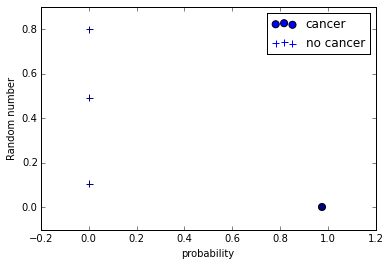

In [87]:
X_test_special=np.concatenate((newdata[:,indx_structure], newtxt[:,indx_txt]), axis=1)
ff_proba=ff.predict_proba(X_test_special)
Probability.append(ff_proba)
indx1=np.where(newy==1)
indx2=np.where(newy==0)
#print indx1
yy= np.random.random_sample((len(newy),))
plt.clf()
#plt.scatter([0, 1], [0, 1])
plt.scatter(ff_proba[:,1][indx1], yy[indx1], c=newy[indx1], s=50,marker='o',label='cancer')
plt.scatter(ff_proba[:,1][indx2], yy[indx2], c=newy[indx2], s=50,marker='+',label='no cancer')
plt.xlabel('probability')
plt.ylabel('Random number')
plt.legend(loc='best')
plt.show()
#prb=cus_probability(threshold, ff_proba[:,1])
#prb=np.array(prb)

In [52]:
print str(X_test.shape)
print len( indx_structure)
print len( indx_txt)

(66L, 280L)
100
180
